<a href="https://colab.research.google.com/github/gizdatalab/SDG_11_Tracking_Colombia/blob/main/Tracking_SDG_11_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequiaries to execute GEE Code

In [3]:
%%capture
!pip install  geemap
!pip install folium
!pip install geopandas
#!pip install ipyleaflet

In [4]:
!earthengine authenticate 

Instructions for updating:
non-resource variables are not supported in the long term
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=-vyto_sjvuMKsXGWZ_XKX53kSep5sw03jNXaOLfjstc&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g7m6YupndMrxZeRVNWXWzgFknBt7K5K395BtRRn_0y9WSAi9Q7mMrU

Successfully saved authorization token.


In [5]:
# Import, authenticate and initialize the Earth Engine library.
import ee
import numpy as np
import geemap
#import geemap
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

# Goal 11: Make cities and human settlements inclusive, safe, resilient and sustainable
Target 11.7: By 2030, provide universal access to safe, inclusive and accessible, green and public spaces, in particular for women and children, older persons and persons with disabilities
# Indicator 11.7.1: Average share of the built-up area of cities that is open space for public use for all, by sex, age and persons with disabilities 

https://unstats.un.org/sdgs/metadata/files/Metadata-11-07-01.pdf

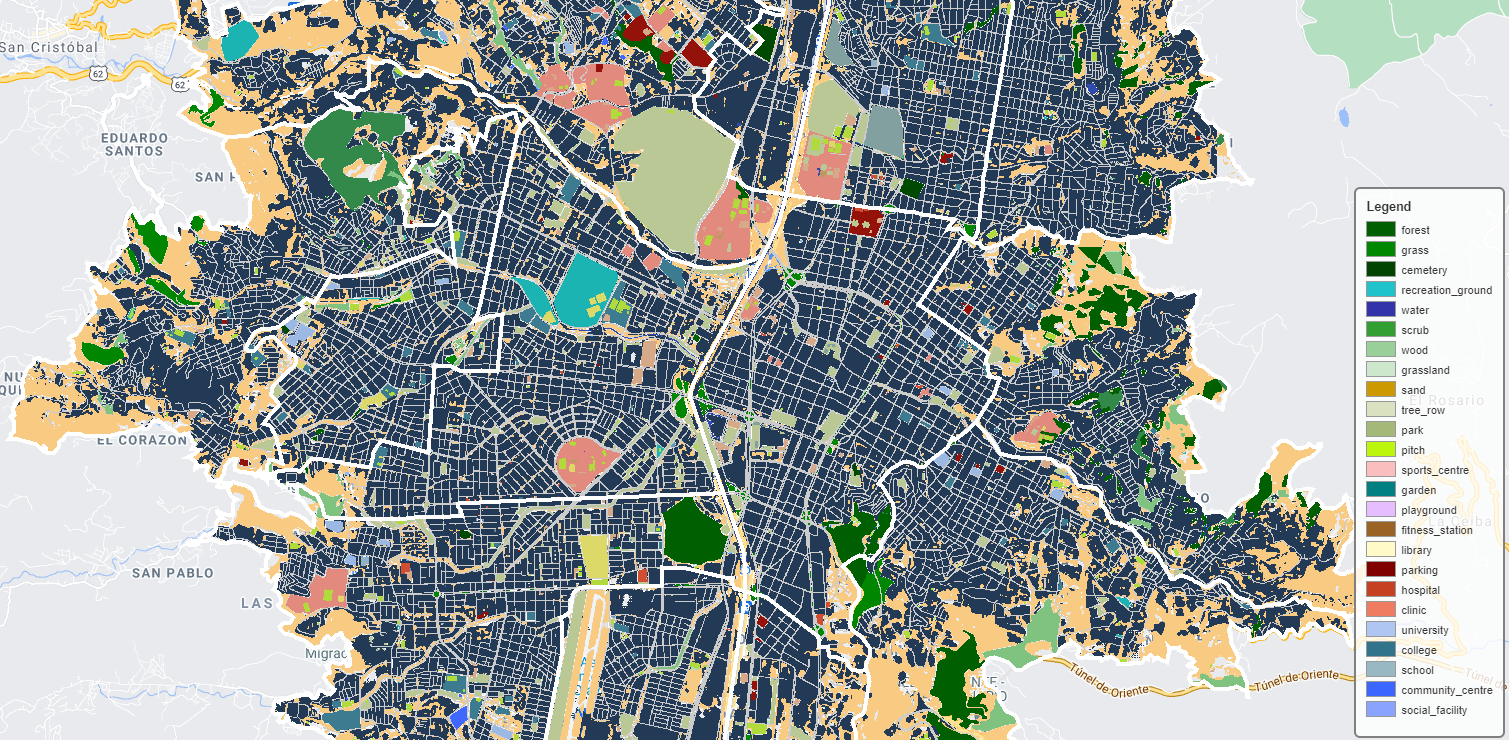

## Definition and concepts:
Indicator 11.7.1 has several interesting concepts that required global consultations and consensus. These
include; built-up area, cities, open spaces for public use, etc. As a custodian agency, UN-Habitat has
worked on these concepts along with several other partners.


### a) City 
A range of accepted definitions of the “city” exist, from those based on population
data and extent of the built-up area to those that are based solely on administrative
boundaries. These definitions vary within and between nations, complicating the task
of international reporting for the SDGs. Definitions of cities, metropolitan areas and
urban agglomerations also vary depending on legal, administrative, political, economic
or cultural criteria in the respective countries and regions. Since 2016UN-Habitat and
partners organized global consultations and discussions to narrow down the set of
meaningful definitions that would be helpful for the global monitoring and reporting
process. Following consultations with 86 member states, the United Nations Statistical
Commission, in its 51st Session (March 2020) endorsed the Degree of Urbanisation
(DEGURBA) as a workable method to delineate cities, urban and rural areas for
international statistical comparisons. 1 This definition combines population size and
population density thresholds to classify the entire territory of a country along the
urban-rural continuum, and captures the full extent of a city, including the dense
neighbourhoods beyond the boundary of the central municipality. DEGURBA is applied
in a two-step process: First, 1 km2 grid cells are classified based on population density,
contiguity and population size. Subsequently, local units are classified as urban or rural
based on the type of grid cells in which majority of their population resides. For the
computation of indicator 11.7.1, countries are encouraged to adopt the degree of
urbanisation to define the analysis area (city or urban area).

### b) Built-up area of cities: 
Conventionally, built up areas of cities are areas occupied by
buildings and other artificial surfaces. For indicator 11.7.1, built up areas, as the
indicator denominator has the same meaning as “city” (see definition of city above).
Public space: The Global Public Space toolkit defines Public Space as all places that
are publicly owned or of public use, accessible and enjoyable by all, for free and
without a profit motive, categorized into streets, open spaces and public facilities.
###Public space 
in general is defined as the meeting or gathering places that exist
outside the home and workplace that are generally accessible by members of the
public, and which foster resident interaction and opportunities for contact and
proximity. This definition implies a higher level of community interaction and places
a focus on public involvement rather than public ownership or stewardship. For the
purpose of monitoring and reporting on indicator 11.7.1, public space is defined as
all places of public use, accessible by all, and comprises open public space and
streets. 

###c) Open public space: 
is any open piece of land that is undeveloped or land with no
buildings (or other built structures) that is accessible to the public without charge, and
provides recreational areas for residents and helps to enhance the beauty and
environmental quality of neighbourhoods. UN-Habitat recognizes that different cities
have different types of open public spaces, which vary in both size and typology. Based
on the size of both soft and hard surfaces, open public spaces are broadly classified into
six categories: national/metropolitan open spaces, regional/larger city open spaces,
district/city open spaces, neighbourhood open spaces, local/pocket open spaces and
linear open spaces. Classification of open public space by typology is described by the
function of the space and can include: green public areas, riparian reserves, parks and
urban forests, playground, square, plazas, waterfronts, sports field, community
gardens, parklets and pocket parks. 

### d) Potential open public space: 
the identification of open public spaces across cities can
be implemented through, among other sources, analysis of high to very high resolution
satellite imagery, from base-maps provided by different organizations (eg
OpenStreetMap, Esri, etc) or as crowd-sourced and volunteered data. While these
sources provide important baseline data for indicator 11.7.1, some of the identifiable
spaces may not meet the criteria of being “accessible to the public without charge”.
The term “potential open public space” is thus used to refer to open public spaces
which are extracted from the above-mentioned sources (based on their spatial
character), but which are not yet validated to confirm if they are accessible to the
public without charge. 

### e) Streets 
are defined thoroughfares that are based inside urban areas, towns, cities and
neighbourhoods most commonly lined with houses or buildings used by pedestrians or
vehicles in order to go from one place to another in the city, interact and to earn a
livelihood. The main purpose of a street is facilitating movement and enabling public
interaction. The following elements are considered as streets space: Streets, avenues
and boulevards, pavements, passages and galleries, Bicycle paths, sidewalks, traffic
island, tramways and roundabouts. Elements excluded from street space include plots (either built-up), open space blocks, railways, paved space within parking lots and
airports and individual industries.

### f) Land allocated to streets
 refers to the total area of the city/urban area that is occupied
by all forms of streets (as defined above). This indicator only includes streets available
at the time of data collection and excludes proposed networks.


For more details and illustrations on the definition of the different types of open spaces considered for
indicator 11.7.1 see SDG 11.7.1 step by step training module
(https://unhabitat.org/sites/default/files/2020/07/indicator_11.7.1_training_module_public_space.pdf).


## Implementation

### Delimitation of the study area 


####  Degree of Urbanisation 
** HARMONISED GLOBAL DEFINITION OF CITIES AND SETTLEMENTS**  
https://data.jrc.ec.europa.eu/dataset/jrc-ghsl-ghs_smod_pop_globe_r2016a

Several new global agendas call for the collection of harmonised indicators for cities, urban and rural areas. Because no harmonised method to delineate these areas is available, indicators rely on national definitions, which vary considerably and thus limit international comparability.

The 2030 Agenda for Sustainable Development, the New Urban Agenda and the global strategy to improve agricultural and rural statistics contain calls for the collection of harmonised indicators for cities and urban and rural areas to support consistent international comparisons across countries.

This new method, called the Degree of Urbanisation, classifies the entire territory of a country into three classes:

1.   cities
2.   towns and semi-dense areas
3.   rural areas


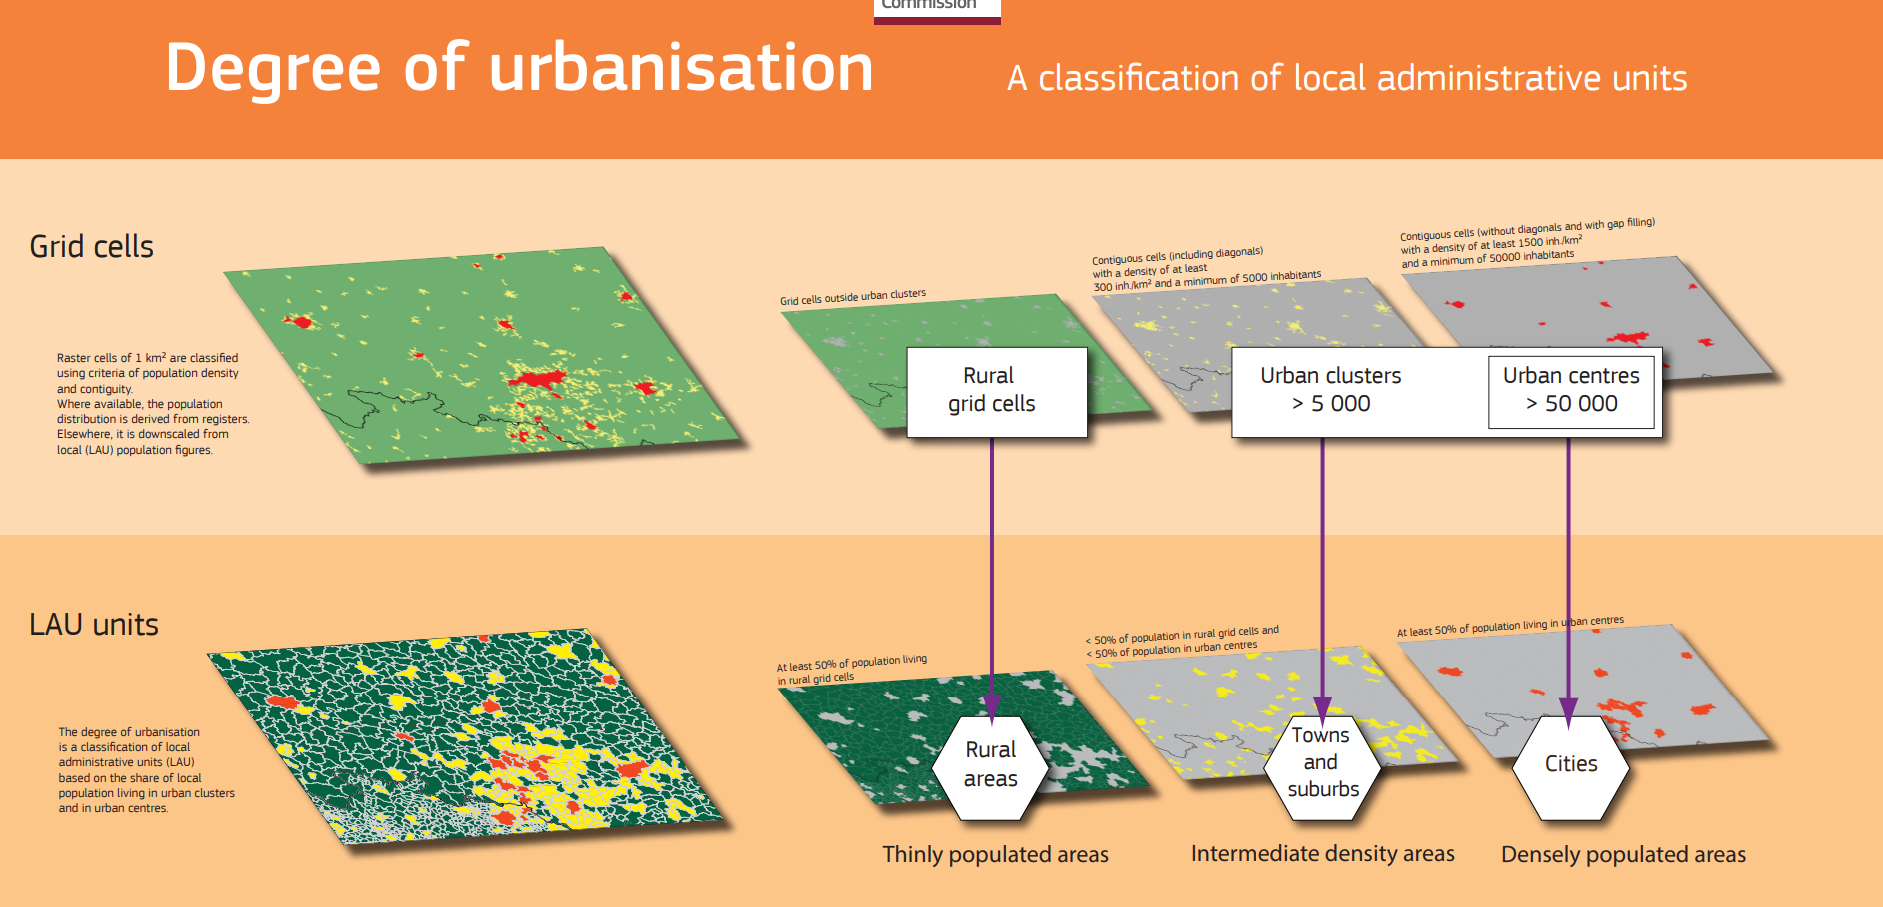

#### Define area of interest

In [6]:
# specify the area of interest - country boundaries colombia from the FAO datase
AOI = ee.Geometry.Point(-75.567,6.238) #medellin

In [7]:
adminArea_city = ee.FeatureCollection("FAO/GAUL/2015/level2")\
                        .filterBounds(AOI)   
adminArea = ee.FeatureCollection("FAO/GAUL/2015/level1")\
                        .filterBounds(AOI)   

#adminArea_city = ee.FeatureCollection("users/eriklehmann91/MGN_MPIO_POLITICO")\
#                        .filterBounds(AOI)   
adminArea_city = ee.FeatureCollection("users/eriklehmann91/MGN_URB_AREA_CENSAL")\
                  .filterBounds(AOI)

In [8]:
# Give the pixel size when converting vectors to rasters
pixSize = 5;

In [9]:
# load degree of urbanization map from EU JRC
# https://ghsl.jrc.ec.europa.eu/degurba.php

degreeOfUrbanization = ee.ImageCollection("JRC/GHSL/P2016/SMOD_POP_GLOBE_V1")\
                          .filter(ee.Filter.date('2015-01-01', '2015-01-15'))\
                          .select('smod_code') \
                          .mosaic()\
                          .clip(adminArea_city)

### Load build up spaces

In [10]:
# Load the dataset 2018 buildup by EU JRC
cnn_city = ee.ImageCollection('users/ghsl/S2_CNN')\
              .mosaic()\
              .select(['b1'],['target'])\
              .gt(20)\
              .clip(adminArea_city)
# Vizualize the dataset


In [11]:
# load own buildup prediction for Medellin
cnn_city = ee.Image('users/eriklehmann91/medellin_region_buildup_2020')\
                    .select(['crop_prob'],['target'])\
                    .gt(.2)\
                    .clip(adminArea_city)


For the analysis we only use the unit cities.

In [12]:
# Create a binary mask.
mask = degreeOfUrbanization.gt(0);
mask_urb = degreeOfUrbanization.gt(2);

# Update the composite mask with the water mask.
degreeOfUrbanization = degreeOfUrbanization.updateMask(mask);

In [24]:
# plot zones
Map = geemap.Map(center=[6.24,-75.557], zoom=13)

visParams = {
  'min': 1.0,
  'max': 3.0,
  'palette': ['FCE202', 'F58D00', 'F51300'],
}
#Map.setCenter(-75.6,6.2);
Map.add_basemap('ESRI')
Map.addLayer(degreeOfUrbanization, visParams, 'cities / towns and semi-dense areas / rural areas 2015');
Map.addLayer(cnn_city.mask(cnn_city.gt(0.2)), {'bands': ['target'], 'min':0.2, 'max': 1}, 'jrc');
#Map.addLayer(adminArea_city)
Map

*We only use the red - urban area as our area of study* 

In [25]:
vector_image = degreeOfUrbanization.updateMask(degreeOfUrbanization.gt(2))
#convert raster to vector
vectors = vector_image.reduceToVectors(geometry=adminArea_city,crs=degreeOfUrbanization.projection(),scale=10,geometryType='polygon')

#### Calculate urban area and build up area in ha

In [42]:
def share(x,y):
    print(round(x / y * 100,2),'%')

def calc_space(image,band,region=vectors,ha=True):
    '''
    calculate area in hectare
    '''
    if ha:
        ha_no = 1e4 
    else:
        ha_no = 1e6
        print('in square kilometer') 
    areaImage = image.multiply(ee.Image.pixelArea())
    area = areaImage.reduceRegion(ee.Reducer.sum(), region, scale= pixSize,  maxPixels= 1e25)
    Area = ee.Number(area.get(band)).divide(ha_no).round().getInfo()
    return Area

Size of the study area

In [44]:
urbanArea = calc_space(vector_image,'smod_code',adminArea_city)
urbanArea

34222

Size of buildup area

In [38]:
cnn_city = cnn_city.mask(cnn_city.gt(0.2))
cnn_city_2 = cnn_city.gt(0.2)

buildupArea = calc_space(cnn_city_2,'target',adminArea_city,True)
buildupArea

8398

In [40]:
share(buildupArea , urbanArea)

24.54 %


In [32]:
# plot zones
Map = geemap.Map(center=[6.24,-75.557], zoom=13)

visParams = {
  'min': 1.0,
  'max': 3.0,
  'palette': ['FCE202', 'F58D00', 'F51300'],
}
#Map.setCenter(-75.6,6.2);
Map.add_basemap('ESRI')
Map.addLayer(vector_image, {'palette':['ffffff']}, 'cities / towns and semi-dense areas / rural areas 2015');
Map.addLayer(cnn_city, {'bands': ['target'], 'min':0.2, 'max': 1,'palette':['ff0000']}, 'jrc');
#Map.addLayer(adminArea_city)
Map

*In our case we do not distinguish between public and non-public places, but between public places and green areas. For this distinction we use the data from OSM and combine it with Sentinel-2 satellite data. We calculate the Normalized Difference Vegetation Index as an indicator of the greenness of vegetation to distinguish it from public places.*

### Import from OSM extracted Data
Script for extraction: https://github.com/gizdatalab/SGD_11_Tracking_Colombia/blob/main/OSM_Overpass_API.ipynb

In [45]:
OSM_polygons = ee.FeatureCollection('users/eriklehmann91/SDG_OSM/medellin_public_place') 

#### Filer OSM

In [ ]:
OSM_polygons.first().getInfo()

Those tags can be used to filter the OSM data

In [47]:
tags = ee.List(OSM_polygons.aggregate_array('tag'))
tags.distinct().getInfo()

['wood',
 'fitness_station',
 'library',
 'parking',
 'hospital',
 'clinic',
 'university',
 'college',
 'school',
 'community_centre',
 'social_facility',
 'forest',
 'grass',
 'cemetery',
 'recreation_ground',
 'water',
 'scrub',
 'grassland',
 'sand',
 'tree_row',
 'park',
 'pitch',
 'garden',
 'playground',
 'sports_centre']

Some of the geometries provided in OSM might contain more than one land use / and cover category, which does not allow a clear assignation. Clearly, buildings need to be removed from other geometries such as “university” or  school”to retrieve the “open” public spaces, excluding the building areas. We therefore seperate buildings from the polygones.

In [ ]:
OSM_build = OSM_polygons.filter("building != 0")

OSM_polygons_f = OSM_polygons.filter("building == 0")
print(OSM_polygons_f.size().getInfo())

The following data points are up to discussion if they should be excluded, we did so.

In [48]:
OSM_polygons_f = OSM_polygons.filter("tag != 'water'")
OSM_polygons_f = OSM_polygons_f.filter("tag != 'hospital'")
OSM_polygons_f = OSM_polygons_f.filter("tag != 'clinic'")
OSM_polygons_f = OSM_polygons_f.filter("tag != 'playground'")
OSM_polygons_f = OSM_polygons_f.filter("tag != 'university'")
OSM_polygons_f = OSM_polygons_f.filter("tag != 'college'")
OSM_polygons_f = OSM_polygons_f.filter("tag != 'school'")
OSM_polygons_f = OSM_polygons_f.filter("tag != 'sports_centre'")
print(OSM_polygons_f.size().getInfo())

3680


This function converts OSM_polygons to raster data.

In [49]:
# convert OSM_polygons to raster 

def make_FID(feature):
  return feature.set('FID', 1)

# filter by boundaries and apply the joint filter
publicSpacesOSM = OSM_polygons_f.filterBounds(vectors)\
                           .map(make_FID)\
                           .reduceToImage(['FID'], ee.Reducer.firstNonNull())\
                           .select(['first'],['publicSpace'])\
                           .reproject('epsg:4326',None,pixSize)\
                           #.clip(adminArea)\
                           #.unmask(0);


In [50]:
# plot zones
Map = geemap.Map(center=[6.25,-75.6], zoom=14)

# Set some visualization parameters
roadsViz = {min:0, max:1, "palette":['7f2a6c']};
Map.add_basemap('ESRI')
Map.addLayer(cnn_city, {'bands': ['target'], 'min':0.5, 'max': 1}, 'build up');
Map.addLayer(publicSpacesOSM.mask(publicSpacesOSM.eq(1)), {min: 0, max: 1, 'palette':['ff6f5c']}, 'public spaces');

Map

#### Identify green public spaces

In [51]:
#@title cloud mask sentinel-2
#https://developers.google.com/earth-engine/tutorials/community/sentinel-2-s2cloudless

def get_s2_sr_cld_col(aoi, start_date, end_date):
    # Import and filter S2 SR.
    s2_sr_col = (ee.ImageCollection('COPERNICUS/S2_SR')
        #.filterBounds(area)
        .filterDate(start_date, end_date)
        .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', CLOUD_FILTER)))
        #.sort('CLOUD_COVER')
        #.first())

    # Import and filter s2cloudless.
    s2_cloudless_col = (ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY')
        #.filterBounds(area)
        .filterDate(start_date, end_date))
        #.sort('CLOUD_COVER')
        #.first())

    # Join the filtered s2cloudless collection to the SR collection by the 'system:index' property.
    return ee.ImageCollection(ee.Join.saveFirst('s2cloudless').apply(**{
        'primary': s2_sr_col,
        'secondary': s2_cloudless_col,
        'condition': ee.Filter.equals(**{
            'leftField': 'system:index',
            'rightField': 'system:index'
        })
    }))

def add_cloud_bands(img):
    # Get s2cloudless image, subset the probability band.
    cld_prb = ee.Image(img.get('s2cloudless')).select('probability')

    # Condition s2cloudless by the probability threshold value.
    is_cloud = cld_prb.gt(CLD_PRB_THRESH).rename('clouds')

    # Add the cloud probability layer and cloud mask as image bands.
    return img.addBands(ee.Image([cld_prb, is_cloud]))

def add_shadow_bands(img):
    # Identify water pixels from the SCL band.
    not_water = img.select('SCL').neq(6)

    # Identify dark NIR pixels that are not water (potential cloud shadow pixels).
    SR_BAND_SCALE = 1e4
    dark_pixels = img.select('B8').lt(NIR_DRK_THRESH*SR_BAND_SCALE).multiply(not_water).rename('dark_pixels')

    # Determine the direction to project cloud shadow from clouds (assumes UTM projection).
    shadow_azimuth = ee.Number(90).subtract(ee.Number(img.get('MEAN_SOLAR_AZIMUTH_ANGLE')));

    # Project shadows from clouds for the distance specified by the CLD_PRJ_DIST input.
    cld_proj = (img.select('clouds').directionalDistanceTransform(shadow_azimuth, CLD_PRJ_DIST*10)
        .reproject(**{'crs': img.select(0).projection(), 'scale': 100})
        .select('distance')
        .mask()
        .rename('cloud_transform'))

    # Identify the intersection of dark pixels with cloud shadow projection.
    shadows = cld_proj.multiply(dark_pixels).rename('shadows')

    # Add dark pixels, cloud projection, and identified shadows as image bands.
    return img.addBands(ee.Image([dark_pixels, cld_proj, shadows]))

def add_cld_shdw_mask(img):
    # Add cloud component bands.
    img_cloud = add_cloud_bands(img)

    # Add cloud shadow component bands.
    img_cloud_shadow = add_shadow_bands(img_cloud)

    # Combine cloud and shadow mask, set cloud and shadow as value 1, else 0.
    is_cld_shdw = img_cloud_shadow.select('clouds').add(img_cloud_shadow.select('shadows')).gt(0)

    # Remove small cloud-shadow patches and dilate remaining pixels by BUFFER input.
    # 20 m scale is for speed, and assumes clouds don't require 10 m precision.
    is_cld_shdw = (is_cld_shdw.focal_min(2).focal_max(BUFFER*2/20)
        .reproject(**{'crs': img.select([0]).projection(), 'scale': 20})
        .rename('cloudmask'))

    # Add the final cloud-shadow mask to the image.
    return img_cloud_shadow.addBands(is_cld_shdw)

def apply_cld_shdw_mask(img):
    # Subset the cloudmask band and invert it so clouds/shadow are 0, else 1.
    not_cld_shdw = img.select('cloudmask').Not()

    # Subset reflectance bands and update their masks, return the result.
    return img.select('B.*').updateMask(not_cld_shdw)
    #return img.select(BANDS).updateMask(not_cld_shdw)

In [52]:
START_DATE = '2020-05-30'
END_DATE = '2021-05-31'
CLOUD_FILTER = 50
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50

In [54]:
s2_sr_cld_col = get_s2_sr_cld_col(adminArea_city, START_DATE, END_DATE)
s2_sr_cld_col = s2_sr_cld_col.filterBounds(adminArea_city)

image_raw = (s2_sr_cld_col.map(add_cld_shdw_mask)
                             .map(apply_cld_shdw_mask)
                             .median()
                             .multiply(0.0005))


RGB_bands = ['B4','B3','B2'] #RGB
NDVI_bands = ['B8','B4'] #NIR

image_ndvi = image_raw.normalizedDifference(NDVI_bands).rename(['NDVI'])
image_rgb = image_raw.select(RGB_bands).rename(['R','G','B']) 
image = image_rgb.addBands(image_ndvi).addBands(cnn_city)

The plot shows the vegetated areas according to the NDVI threshold.

In [55]:
# plot zones
Map = geemap.Map(center=[6.25,-75.6], zoom=15)

# Set some visualization parameters
roadsViz = {min:0, max:1, "palette":['cccccc']};
Map.add_basemap('ESRI')

#Map.addLayer(clean_grean.clip(neighborhood), {min: 0, max: 1, 'palette':['f9cb82']},'NDVI', True);
Map.addLayer(image, {'bands': ['R', 'G', 'B'], 'min': 0, 'max': 1, 'gamma': 1.1},'rgb')
Map.addLayer(image_ndvi.mask(image_ndvi.gt(.4)), {'bands': ['NDVI'], 'min': 0, 'max': 1, 'gamma': 1.1},'NDVI', True);

Map

In [59]:
greenPublicUrbanSpace = image_ndvi.mask(image_ndvi.gt(.5))
                                      #).updateMask(publicSpacesOSM.unmask().eq(0))\
                                      #.updateMask(areaResidentialRoads.unmask().eq(0))\
                                      #.updateMask(areaOtherRoads.unmask().eq(0))\

greenPublicUrbanSpace_m = ee.Image(1).clip(adminArea_city).mask(greenPublicUrbanSpace.gt(0.4))
publicSpacesOSMArea = calc_space(greenPublicUrbanSpace_m,'constant',adminArea_city,True)
publicSpacesOSMArea

3527

In [60]:
calc_space(publicSpacesOSM,'publicSpace')

1386

#### Load Streets from OSM data
Streets are only stored as lines without a width, we therefore convert them to areas and distinguish between Residential and other Roads

In [61]:
#OSM_lines = ee.FeatureCollection('users/S2_NDVI/SDG/OSM_Col_Bogota_lines')
OSM_lines = ee.FeatureCollection('users/eriklehmann91/SDG_OSM/medellin_street') 

# define "typical" (e.g. average) street widths (in meters) for different type of roads
widthResidantial = 1.5;
widthOtherRoads = 3;

# Give the pixel size when converting vectors to rasters
pixSize = 5;

In [62]:

# Select individiual road types using the OSM "fclass" field
residentialRoads = OSM_lines.filterBounds(vectors).filter(ee.Filter.eq('highway', 'residential'));


# Create a list of filters to get different attributes
filterPrim = ee.Filter.stringContains('highway', 'primary');
filterSecon = ee.Filter.stringContains('highway', 'second');
filterTert = ee.Filter.stringContains('highway', 'terti');


# Create a joint filter
listOfFilters = ee.Filter.Or(filterPrim, filterSecon, filterTert)


# filter by boundaries and apply the joint filter
otherRoads = OSM_lines.filterBounds(vectors).filter(listOfFilters);


def make_buffers(feature):
  return feature.buffer(bufferDist).set('FID', 1)

bufferDist = widthResidantial 

# Create buffers around OSM street geometries to create polygons / raster of the street area
residentialRoads = residentialRoads.map(make_buffers).set('FID', 1)
areaResidentialRoads = residentialRoads.reduceToImage(['FID'], ee.Reducer.firstNonNull())\
                                            .reproject('epsg:4326',None,pixSize)\
                                            .clip(vectors);

bufferDist = widthOtherRoads 
areaOtherRoads = otherRoads.map(make_buffers)\
                                .reduceToImage(['FID'], ee.Reducer.firstNonNull())\
                                .reproject('epsg:4326',None,pixSize)\
                                .clip(vectors);



In [63]:
# plot zones
Map = geemap.Map(center=[6.25,-75.6], zoom=13)

# Set some visualization parameters
roadsViz = {min:0, max:1, "palette":['7f2a6c']};
Map.add_basemap('ESRI')
Map.addLayer(cnn_city, {'bands': ['target'], 'min':0.2, 'max': 1}, 'jrc');
Map.addLayer(areaResidentialRoads,roadsViz, 'ResidentialRoads', True);
Map.addLayer(areaOtherRoads,roadsViz, 'OtherRoads', True);

#Map.addLayer(adminArea,{},'area')
Map

#### Final update layers to avoid overlaps
To not double count we mask the layers so that every pixel is only assigned to one attribute.

In [ ]:
publicSpacesOSM = publicSpacesOSM.mask(publicSpacesOSM.gt(0))\
                .updateMask(publicBuildingsOSM.unmask().eq(0))\
                .updateMask(areaResidentialRoads.unmask().eq(0))\
                .updateMask(areaOtherRoads.unmask().eq(0))\


#publicSpacesOSMArea = calc_space(publicSpacesOSM,'publicSpace',med,pixSize)
#publicSpacesOSMArea

In [ ]:
 city = cnn_city.mask(cnn_city.gt(.2))\
                .updateMask(publicSpacesOSM.unmask().eq(0))\
                .updateMask(image_ndvi.unmask().lt(0.6))\
                .updateMask(areaResidentialRoads.unmask().eq(0))\
                .updateMask(areaOtherRoads.unmask().eq(0))

#city = ee.Image(1).clip(med).mask(city)

#buildupArea = calc_space(city,'target',med,pixSize)
#buildupArea

In [ ]:
greenPublicUrbanSpace = image_ndvi.mask(image_ndvi.gt(.6)).updateMask(publicSpacesOSM.unmask().eq(0))\
                                      .updateMask(areaResidentialRoads.unmask().eq(0))\
                                      .updateMask(areaOtherRoads.unmask().eq(0))\

greenPublicUrbanSpace_m = ee.Image(1).clip(med).mask(greenPublicUrbanSpace.gt(0.4))
#publicSpacesOSMArea = calc_space(greenPublicUrbanSpace_m,'constant',med,pixSize)
#publicSpacesOSMArea

In [66]:
palette = ['005f00', '008800', '004400','20c3cb', '3333aa',  
          '329f32', '99cf99', 'cce7cc', 'cc9900', 'd9e1c1',
           'a4b877', 'bcf60c', 'fabebe', '008080', 'e6beff',
           '9a6324', 'fffac8', '800000', 'c64022', 'ef7b61',
           'afc6f3', '31738a', '98b9c4', '3b66ff', '89a3ff']

label = ['forest', 'grass', 'cemetery', 'recreation_ground', 'water', 
         'scrub', 'wood', 'grassland', 'sand', 'tree_row',
         'park', 'pitch', 'sports_centre', 'garden', 'playground',
         'fitness_station', 'library', 'parking', 'hospital', 'clinic',
         'university', 'college', 'school', 'community_centre', 'social_facility']

ld2 = dict(zip(label,palette))

pp_viz = {
  'min': 0,
  'max': 25,
  'palette': palette,
};

In [76]:
# plot zones
Map = geemap.Map(center=[6.25,-75.6], zoom=15)

# Set some visualization parameters
roadsViz = {min:0, max:1, "palette":['cccccc']};
Map.add_basemap('ESRI')
Map.addLayer(greenPublicUrbanSpace_m.clip(adminArea_city), {'palette':['f9cb82']},'NDVI', True);

Map.addLayer(city.clip(adminArea_city), {'bands': ['target'], 'min':0.5, 'max': 1,'palette':['223a55']}, 'build up');
Map.addLayer(publicSpacesOSM.mask(publicSpacesOSM.eq(1)).clip(adminArea_city), {min: 0, max: 1, 'palette':['ff6f5c']}, 'public spaces');
Map.addLayer(areaResidentialRoads.clip(adminArea_city),roadsViz, 'street 2');
Map.addLayer(areaOtherRoads.clip(adminArea_city), roadsViz, 'street 3');
#Map.add_legend(legend_title='Legend', legend_dict=ld2, position='bottomright')

Map

In [70]:
ResidentialRoadsArea = calc_space(areaResidentialRoads,'first',adminArea_city,True)
ResidentialRoadsArea

1174

In [71]:
OtherRoadsArea = calc_space(areaOtherRoads,'first',adminArea_city,True)
OtherRoadsArea

772

#### Problems

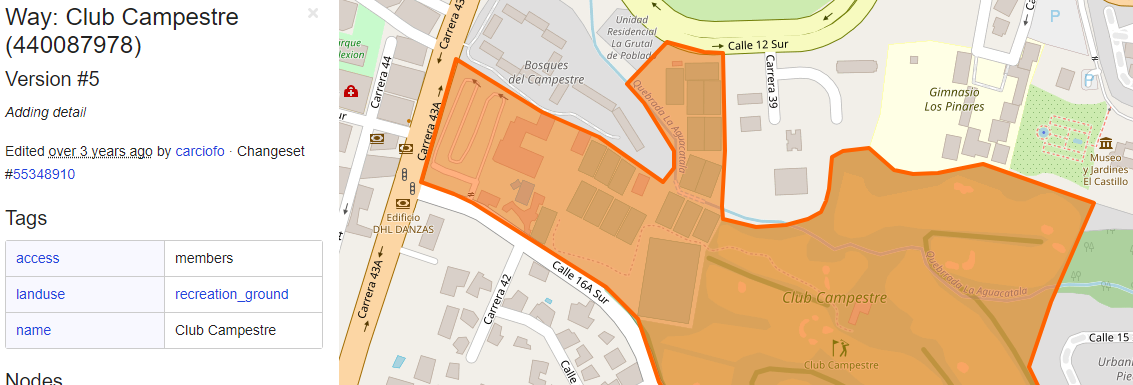

### Calculate Share of public space

In [ ]:
%%time
greenPublicUrbanSpace_a = calc_space(greenPublicUrbanSpace_m,'constant',med,pixSize,True)
publicSpacesOSM_a = calc_space(publicSpacesOSM,'publicSpace',med,pixSize,True)
areaResidentialRoads_a = calc_space(areaResidentialRoads,'first',med,pixSize,True)
areaOtherRoads_a = calc_space(areaOtherRoads,'first',med,pixSize,True)
buildupArea = calc_space(city,'target',med,pixSize,True)

CPU times: user 1.63 s, sys: 202 ms, total: 1.83 s
Wall time: 6min 3s


In [ ]:
pub_space = greenPublicUrbanSpace_a+ publicSpacesOSM_a + areaResidentialRoads_a + areaOtherRoads_a
pub_space_wo =  publicSpacesOSM_a + areaResidentialRoads_a + areaOtherRoads_a
streets = areaResidentialRoads_a + areaOtherRoads_a

print('share of potential public space',share(publicSpacesOSM_a,(buildupArea+pub_space)))
print('share of vegetation areas',share(greenPublicUrbanSpace_a,(buildupArea+pub_space)))
print('share of streets', share(streets,(buildupArea+pub_space)))
print('share of potential public space excl. vegetation areas',share(pub_space_wo,(buildupArea+pub_space)))
print('share of potential public space incl. vegetation areas',share(pub_space,(buildupArea+pub_space)))

12.97 %
share of potential public space None
16.36 %
share of vegetation areas None
17.1 %
share of streets None
30.07 %
share of potential public space excl. vegetation areas None
46.43 %
share of potential public space incl. vegetation areas None


### Export Image

In [ ]:
city.addBand(areaResidentialRoads)\
    .addBand(areaOtherRoads)\
    .addBand(publicSpacesOSM)\
    .addBand(greenPublicUrbanSpace)\

In [ ]:
Export.image.toDrive({
    'image': city,
    'description': 'UrbanPublicOpenSpaces',
    'scale': pixSize,
    'maxPixels': 1e13,
    region: vectors
});